In [57]:
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Plotting dataset in polar coordinates
dataset contains 400 samples of two classes (1 and -1)

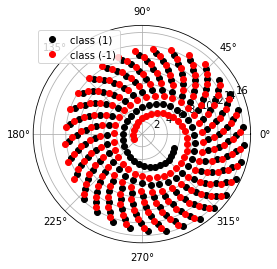

In [58]:
#Declare dataset index U
u = np.arange(1,201,1)

#Declare data points of class 1 (black)
x11 = 2 + (np.sin(0.2*u+8))*(np.sqrt(u+10))
x21 = -1 + (np.cos(0.2*u+8))*(np.sqrt(u+10))
#Declare data points of class -1 (red)
x10 = 2 + (np.sin(0.2*u-8))*(np.sqrt(u+10))
x20 = -1 + (np.cos(0.2*u-8))*(np.sqrt(u+10))

#convert all data sample features from cartesian to polar coordinates.
r1 = np.sqrt(x11**2 + x21**2)
r0 = np.sqrt(x10**2 + x20**2)
theta1 = np.arctan2(x21, x11)
theta0 = np.arctan2(x20, x10)


plt.polar(theta1, r1, 'o', color ='black', label='class (1)')
plt.polar(theta0, r0, 'o', color= 'red', label='class (-1)')
plt.legend()

# # Creating Input and Output data set for training
Input data set:<br/>
each input data point is a list of 5 features (r, theta1, r*theta, sin(r), sin(theta))<br/>
=> 4 units in input layer<br/><br/>
Output data set: <br/>
each data point should be classified in either class 1 or 0<br/>
for some convenient reasons i replace the second class of -1 with class 0

In [82]:
dataset = list() #list of 400 sublists, each sublist contains 5 input-features and 1 output
inputset = list() #list of 400 sublists, each sublist contains 5 input-features
outputset = list() #list of 400 target outputs

for i in range(200):
    dataset.append([r1[i], theta1[i], r1[i]*theta1[i], sin(r1[i]), sin(theta1[i]), 1])
    dataset.append([r0[i], theta0[i], r0[i]*theta0[i], sin(r0[i]), sin(theta0[i]), 0]) 
    
random.shuffle(dataset)

for sublist in dataset:
    inputset.append(sublist[:5])
    outputset.append(sublist[5])
    
inputset = np.array(inputset)
outputset = np.array(outputset)

In [83]:
model = Sequential()
model.add(Dense(units=16, activation = 'tanh', input_dim=5, kernel_initializer='uniform'))
model.add(Dense(units=16, activation = 'tanh', kernel_initializer='uniform'))
model.add(Dense(units=16, activation = 'tanh', kernel_initializer='uniform'))
model.add(Dense(units=1, activation = 'sigmoid', kernel_initializer='uniform'))

#optimizier: RMSprop
#loss funtion: binary_crossentropy
from keras.optimizers import rmsprop
model.compile(optimizer = rmsprop(lr= 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [86]:
model.fit(inputset, outputset, epochs=2000, batch_size=50 )
predict_outputs = model.predict(inputset)

Epoch 1/2000
400/400 [==============================] - 0s 109us/step - loss: 0.3471 - accuracy: 0.8200
Epoch 2/2000
400/400 [==============================] - 0s 44us/step - loss: 0.2883 - accuracy: 0.8400
Epoch 3/2000
400/400 [==============================] - 0s 52us/step - loss: 0.2870 - accuracy: 0.8300
Epoch 4/2000
400/400 [==============================] - 0s 73us/step - loss: 0.2853 - accuracy: 0.8350
Epoch 5/2000
400/400 [==============================] - 0s 63us/step - loss: 0.2880 - accuracy: 0.8325
Epoch 6/2000
400/400 [==============================] - 0s 83us/step - loss: 0.2972 - accuracy: 0.8300
Epoch 7/2000
400/400 [==============================] - 0s 78us/step - loss: 0.3380 - accuracy: 0.7950
Epoch 8/2000
400/400 [==============================] - 0s 75us/step - loss: 0.3097 - accuracy: 0.8350
Epoch 9/2000
400/400 [==============================] - 0s 66us/step - loss: 0.2838 - accuracy: 0.8400
Epoch 10/2000
400/400 [==============================] - 0s 90us/step - 

400/400 [==============================] - 0s 65us/step - loss: 0.3111 - accuracy: 0.8150
Epoch 158/2000
400/400 [==============================] - 0s 68us/step - loss: 0.3296 - accuracy: 0.8175
Epoch 159/2000
400/400 [==============================] - 0s 63us/step - loss: 0.3019 - accuracy: 0.8300
Epoch 160/2000
400/400 [==============================] - 0s 55us/step - loss: 0.3163 - accuracy: 0.8200
Epoch 161/2000
400/400 [==============================] - 0s 71us/step - loss: 0.2890 - accuracy: 0.8125
Epoch 162/2000
400/400 [==============================] - 0s 52us/step - loss: 0.2669 - accuracy: 0.8500
Epoch 163/2000
400/400 [==============================] - 0s 64us/step - loss: 0.3431 - accuracy: 0.8150
Epoch 164/2000
400/400 [==============================] - 0s 67us/step - loss: 0.2903 - accuracy: 0.8450
Epoch 165/2000
400/400 [==============================] - 0s 48us/step - loss: 0.2997 - accuracy: 0.8225
Epoch 166/2000
400/400 [==============================] - 0s 48us/step

400/400 [==============================] - 0s 67us/step - loss: 0.2566 - accuracy: 0.8575
Epoch 312/2000
400/400 [==============================] - 0s 72us/step - loss: 0.2755 - accuracy: 0.8475
Epoch 313/2000
400/400 [==============================] - 0s 60us/step - loss: 0.2723 - accuracy: 0.8500
Epoch 314/2000
400/400 [==============================] - 0s 57us/step - loss: 0.2660 - accuracy: 0.8375
Epoch 315/2000
400/400 [==============================] - 0s 50us/step - loss: 0.2654 - accuracy: 0.8425
Epoch 316/2000
400/400 [==============================] - 0s 75us/step - loss: 0.2689 - accuracy: 0.8550
Epoch 317/2000
400/400 [==============================] - 0s 56us/step - loss: 0.2891 - accuracy: 0.8050
Epoch 318/2000
400/400 [==============================] - 0s 40us/step - loss: 0.3419 - accuracy: 0.7800
Epoch 319/2000
400/400 [==============================] - 0s 109us/step - loss: 0.3267 - accuracy: 0.8300
Epoch 320/2000
400/400 [==============================] - 0s 73us/ste

400/400 [==============================] - 0s 58us/step - loss: 0.2770 - accuracy: 0.8350
Epoch 468/2000
400/400 [==============================] - 0s 66us/step - loss: 0.2945 - accuracy: 0.8200
Epoch 469/2000
400/400 [==============================] - 0s 68us/step - loss: 0.2937 - accuracy: 0.8425
Epoch 470/2000
400/400 [==============================] - 0s 58us/step - loss: 0.2420 - accuracy: 0.8700
Epoch 471/2000
400/400 [==============================] - 0s 73us/step - loss: 0.2535 - accuracy: 0.8350
Epoch 472/2000
400/400 [==============================] - 0s 66us/step - loss: 0.3066 - accuracy: 0.8300
Epoch 473/2000
400/400 [==============================] - 0s 78us/step - loss: 0.2804 - accuracy: 0.8400
Epoch 474/2000
400/400 [==============================] - 0s 68us/step - loss: 0.3247 - accuracy: 0.8275
Epoch 475/2000
400/400 [==============================] - 0s 71us/step - loss: 0.2393 - accuracy: 0.8575
Epoch 476/2000
400/400 [==============================] - 0s 75us/step

400/400 [==============================] - 0s 61us/step - loss: 0.2982 - accuracy: 0.8575
Epoch 623/2000
400/400 [==============================] - 0s 72us/step - loss: 0.2972 - accuracy: 0.8325
Epoch 624/2000
400/400 [==============================] - 0s 53us/step - loss: 0.2777 - accuracy: 0.8475
Epoch 625/2000
400/400 [==============================] - 0s 70us/step - loss: 0.3191 - accuracy: 0.8275
Epoch 626/2000
400/400 [==============================] - 0s 51us/step - loss: 0.2729 - accuracy: 0.8450
Epoch 627/2000
400/400 [==============================] - 0s 65us/step - loss: 0.2891 - accuracy: 0.8450
Epoch 628/2000
400/400 [==============================] - 0s 55us/step - loss: 0.2841 - accuracy: 0.8400
Epoch 629/2000
400/400 [==============================] - 0s 47us/step - loss: 0.2523 - accuracy: 0.8650
Epoch 630/2000
400/400 [==============================] - 0s 76us/step - loss: 0.3796 - accuracy: 0.8150
Epoch 631/2000
400/400 [==============================] - 0s 71us/step

400/400 [==============================] - 0s 73us/step - loss: 0.2559 - accuracy: 0.8575
Epoch 779/2000
400/400 [==============================] - 0s 49us/step - loss: 0.2836 - accuracy: 0.8350
Epoch 780/2000
400/400 [==============================] - 0s 60us/step - loss: 0.2720 - accuracy: 0.8575
Epoch 781/2000
400/400 [==============================] - 0s 51us/step - loss: 0.2540 - accuracy: 0.8575
Epoch 782/2000
400/400 [==============================] - 0s 59us/step - loss: 0.3063 - accuracy: 0.8375
Epoch 783/2000
400/400 [==============================] - 0s 56us/step - loss: 0.2764 - accuracy: 0.8350
Epoch 784/2000
400/400 [==============================] - 0s 72us/step - loss: 0.2634 - accuracy: 0.8375
Epoch 785/2000
400/400 [==============================] - 0s 58us/step - loss: 0.2689 - accuracy: 0.8500
Epoch 786/2000
400/400 [==============================] - 0s 52us/step - loss: 0.2840 - accuracy: 0.8250
Epoch 787/2000
400/400 [==============================] - 0s 59us/step

400/400 [==============================] - 0s 37us/step - loss: 0.2962 - accuracy: 0.8325
Epoch 935/2000
400/400 [==============================] - 0s 38us/step - loss: 0.2747 - accuracy: 0.8525
Epoch 936/2000
400/400 [==============================] - 0s 35us/step - loss: 0.2588 - accuracy: 0.8575
Epoch 937/2000
400/400 [==============================] - 0s 36us/step - loss: 0.2833 - accuracy: 0.8400
Epoch 938/2000
400/400 [==============================] - 0s 31us/step - loss: 0.3197 - accuracy: 0.8175
Epoch 939/2000
400/400 [==============================] - 0s 33us/step - loss: 0.2414 - accuracy: 0.8800
Epoch 940/2000
400/400 [==============================] - 0s 31us/step - loss: 0.2455 - accuracy: 0.8650
Epoch 941/2000
400/400 [==============================] - 0s 33us/step - loss: 0.2945 - accuracy: 0.8550
Epoch 942/2000
400/400 [==============================] - 0s 34us/step - loss: 0.3052 - accuracy: 0.8175
Epoch 943/2000
400/400 [==============================] - 0s 34us/step

400/400 [==============================] - 0s 36us/step - loss: 0.2401 - accuracy: 0.8650
Epoch 1013/2000
400/400 [==============================] - 0s 34us/step - loss: 0.2499 - accuracy: 0.8500
Epoch 1014/2000
400/400 [==============================] - 0s 34us/step - loss: 0.2403 - accuracy: 0.8700
Epoch 1015/2000
400/400 [==============================] - 0s 34us/step - loss: 0.2638 - accuracy: 0.8700
Epoch 1016/2000
400/400 [==============================] - 0s 33us/step - loss: 0.2567 - accuracy: 0.8650
Epoch 1017/2000
400/400 [==============================] - 0s 32us/step - loss: 0.2782 - accuracy: 0.8375
Epoch 1018/2000
400/400 [==============================] - 0s 33us/step - loss: 0.2218 - accuracy: 0.8675
Epoch 1019/2000
400/400 [==============================] - 0s 38us/step - loss: 0.2280 - accuracy: 0.8725
Epoch 1020/2000
400/400 [==============================] - 0s 37us/step - loss: 0.2473 - accuracy: 0.8600
Epoch 1021/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 77us/step - loss: 0.2487 - accuracy: 0.8475
Epoch 1167/2000
400/400 [==============================] - 0s 71us/step - loss: 0.2613 - accuracy: 0.8575
Epoch 1168/2000
400/400 [==============================] - 0s 71us/step - loss: 0.2652 - accuracy: 0.8600
Epoch 1169/2000
400/400 [==============================] - 0s 66us/step - loss: 0.2723 - accuracy: 0.8400
Epoch 1170/2000
400/400 [==============================] - 0s 56us/step - loss: 0.2630 - accuracy: 0.8550
Epoch 1171/2000
400/400 [==============================] - 0s 58us/step - loss: 0.2270 - accuracy: 0.8525
Epoch 1172/2000
400/400 [==============================] - 0s 50us/step - loss: 0.2452 - accuracy: 0.8625
Epoch 1173/2000
400/400 [==============================] - 0s 51us/step - loss: 0.2442 - accuracy: 0.8475
Epoch 1174/2000
400/400 [==============================] - 0s 65us/step - loss: 0.2597 - accuracy: 0.8525
Epoch 1175/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 48us/step - loss: 0.3190 - accuracy: 0.8150
Epoch 1321/2000
400/400 [==============================] - 0s 70us/step - loss: 0.2745 - accuracy: 0.8325
Epoch 1322/2000
400/400 [==============================] - 0s 72us/step - loss: 0.2799 - accuracy: 0.8450
Epoch 1323/2000
400/400 [==============================] - 0s 57us/step - loss: 0.2425 - accuracy: 0.8500
Epoch 1324/2000
400/400 [==============================] - 0s 51us/step - loss: 0.2232 - accuracy: 0.8675
Epoch 1325/2000
400/400 [==============================] - 0s 80us/step - loss: 0.2187 - accuracy: 0.8700
Epoch 1326/2000
400/400 [==============================] - 0s 84us/step - loss: 0.3030 - accuracy: 0.8325
Epoch 1327/2000
400/400 [==============================] - 0s 57us/step - loss: 0.3264 - accuracy: 0.8325
Epoch 1328/2000
400/400 [==============================] - 0s 59us/step - loss: 0.2403 - accuracy: 0.8500
Epoch 1329/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 91us/step - loss: 0.3921 - accuracy: 0.8375
Epoch 1475/2000
400/400 [==============================] - 0s 78us/step - loss: 0.3761 - accuracy: 0.8350
Epoch 1476/2000
400/400 [==============================] - 0s 55us/step - loss: 0.2988 - accuracy: 0.8250
Epoch 1477/2000
400/400 [==============================] - 0s 69us/step - loss: 0.2396 - accuracy: 0.8650
Epoch 1478/2000
400/400 [==============================] - 0s 73us/step - loss: 0.2470 - accuracy: 0.8675
Epoch 1479/2000
400/400 [==============================] - 0s 81us/step - loss: 0.2179 - accuracy: 0.8775
Epoch 1480/2000
400/400 [==============================] - 0s 66us/step - loss: 0.2649 - accuracy: 0.8500
Epoch 1481/2000
400/400 [==============================] - 0s 65us/step - loss: 0.2548 - accuracy: 0.8725
Epoch 1482/2000
400/400 [==============================] - 0s 77us/step - loss: 0.2924 - accuracy: 0.8575
Epoch 1483/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 68us/step - loss: 0.2100 - accuracy: 0.8725
Epoch 1552/2000
400/400 [==============================] - 0s 54us/step - loss: 0.2287 - accuracy: 0.8750
Epoch 1553/2000
400/400 [==============================] - 0s 55us/step - loss: 0.2648 - accuracy: 0.8525
Epoch 1554/2000
400/400 [==============================] - 0s 81us/step - loss: 0.3572 - accuracy: 0.8325
Epoch 1555/2000
400/400 [==============================] - 0s 62us/step - loss: 0.2288 - accuracy: 0.8900
Epoch 1556/2000
400/400 [==============================] - 0s 58us/step - loss: 0.2264 - accuracy: 0.8775
Epoch 1557/2000
400/400 [==============================] - 0s 70us/step - loss: 0.2501 - accuracy: 0.8750
Epoch 1558/2000
400/400 [==============================] - 0s 53us/step - loss: 0.2514 - accuracy: 0.8625
Epoch 1559/2000
400/400 [==============================] - 0s 61us/step - loss: 0.1976 - accuracy: 0.9025
Epoch 1560/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 69us/step - loss: 0.2371 - accuracy: 0.8775
Epoch 1706/2000
400/400 [==============================] - 0s 72us/step - loss: 0.2869 - accuracy: 0.8425
Epoch 1707/2000
400/400 [==============================] - 0s 59us/step - loss: 0.2157 - accuracy: 0.8925
Epoch 1708/2000
400/400 [==============================] - 0s 77us/step - loss: 0.2393 - accuracy: 0.8775
Epoch 1709/2000
400/400 [==============================] - 0s 64us/step - loss: 0.3027 - accuracy: 0.8350
Epoch 1710/2000
400/400 [==============================] - 0s 101us/step - loss: 0.2816 - accuracy: 0.8550
Epoch 1711/2000
400/400 [==============================] - 0s 89us/step - loss: 0.2185 - accuracy: 0.8750
Epoch 1712/2000
400/400 [==============================] - 0s 62us/step - loss: 0.2286 - accuracy: 0.8700
Epoch 1713/2000
400/400 [==============================] - 0s 63us/step - loss: 0.2683 - accuracy: 0.8550
Epoch 1714/2000
400/400 [==============================] - 0s

400/400 [==============================] - 0s 66us/step - loss: 0.2322 - accuracy: 0.8675
Epoch 1860/2000
400/400 [==============================] - 0s 75us/step - loss: 0.2030 - accuracy: 0.8950
Epoch 1861/2000
400/400 [==============================] - 0s 82us/step - loss: 0.3170 - accuracy: 0.8375
Epoch 1862/2000
400/400 [==============================] - 0s 65us/step - loss: 0.2026 - accuracy: 0.8950
Epoch 1863/2000
400/400 [==============================] - 0s 62us/step - loss: 0.2655 - accuracy: 0.8675
Epoch 1864/2000
400/400 [==============================] - 0s 88us/step - loss: 0.2713 - accuracy: 0.8650
Epoch 1865/2000
400/400 [==============================] - 0s 52us/step - loss: 0.2224 - accuracy: 0.8675
Epoch 1866/2000
400/400 [==============================] - 0s 77us/step - loss: 0.2122 - accuracy: 0.8875
Epoch 1867/2000
400/400 [==============================] - 0s 54us/step - loss: 0.2751 - accuracy: 0.8600
Epoch 1868/2000
400/400 [==============================] - 0s 

400/400 [==============================] - 0s 55us/step - loss: 0.2676 - accuracy: 0.8450
Epoch 1937/2000
400/400 [==============================] - 0s 75us/step - loss: 0.2118 - accuracy: 0.8700
Epoch 1938/2000
400/400 [==============================] - 0s 69us/step - loss: 0.2265 - accuracy: 0.8700
Epoch 1939/2000
400/400 [==============================] - 0s 69us/step - loss: 0.2183 - accuracy: 0.8775
Epoch 1940/2000
400/400 [==============================] - 0s 46us/step - loss: 0.2218 - accuracy: 0.8675
Epoch 1941/2000
400/400 [==============================] - 0s 55us/step - loss: 0.3144 - accuracy: 0.8325
Epoch 1942/2000
400/400 [==============================] - 0s 62us/step - loss: 0.1937 - accuracy: 0.8900
Epoch 1943/2000
400/400 [==============================] - 0s 51us/step - loss: 0.2254 - accuracy: 0.8800
Epoch 1944/2000
400/400 [==============================] - 0s 61us/step - loss: 0.2022 - accuracy: 0.8950
Epoch 1945/2000
400/400 [==============================] - 0s 

# Plotting Predicted Outputs
the model has an accuracy of 90,25% after 4000 epochs

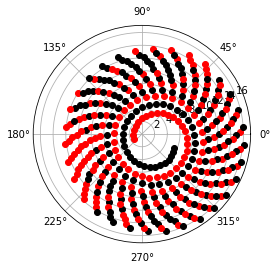

In [87]:
for i in range(400):
    if predict_outputs[i] > 0.5:
        plt.polar(inputset[i][1], inputset[i][0] ,'o' ,color ='black')
    else :    
        plt.polar(inputset[i][1], inputset[i][0] ,'o', color ='red')
                